<a href="https://colab.research.google.com/github/Rahmatws/stokastik_dan_simulasi_t7/blob/main/Tugas7_MarkovChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a. Matriks Transisi T:
T = 
[[0.6 0.4]
 [0.5 0.5]]

Kondisi awal produksi:
Initial state = [0.5 0.5]

b. Kondisi stabil dicapai pada iterasi ke-5:
Steady state = [0.555555 0.444445]


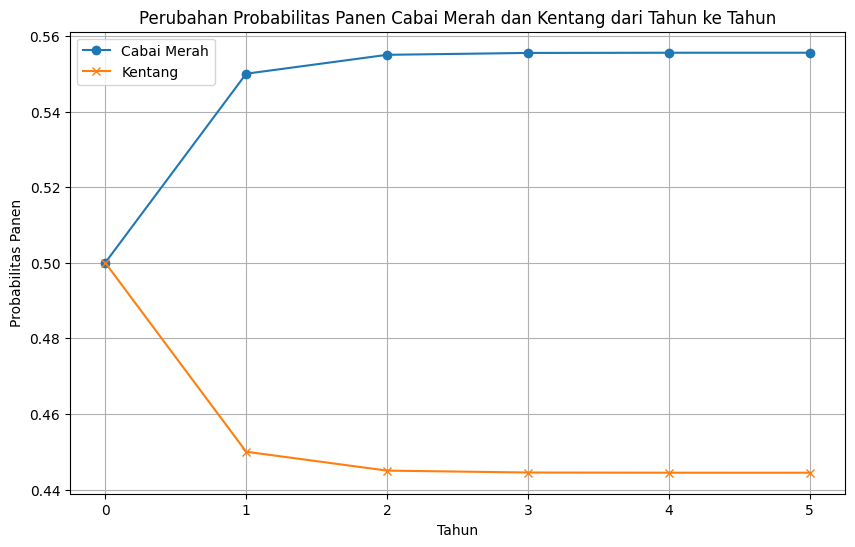


c. Panen lebih banyak mana antara cabai merah dengan kentang?
Produksi cabai merah lebih banyak dibanding kentang di kondisi stabil.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Matriks transisi antara cabai merah dan kentang
# Probabilitas tetap panen cabai merah pada tahun berikutnya adalah 0.6
# Probabilitas berganti panen ke kentang adalah 0.4
# Probabilitas tetap panen kentang adalah 0.5
# Probabilitas berganti panen ke cabai merah adalah 0.5

T = np.array([[0.6, 0.4],  # Baris pertama: Cabai merah
              [0.5, 0.5]]) # Baris kedua: Kentang

# Pertanyaan a: Matriks Transisi T
print("a. Matriks Transisi T:")
print(f"T = \n{T}")

# Kondisi awal produksi (misalkan dimulai dengan produksi cabai merah dan kentang seimbang)
initial_state = np.array([0.5, 0.5])

# Tampilkan kondisi awal
print("\nKondisi awal produksi:")
print(f"Initial state = {initial_state}")

# Iterasi hingga mencapai kondisi stabil (steady state)
threshold = 1e-5  # Ambang batas untuk perbedaan perubahan yang sangat kecil
max_iterations = 1000  # Jumlah iterasi maksimum untuk menghindari loop tak terbatas
iteration = 0
current_state = initial_state

# List untuk menyimpan hasil tiap iterasi (untuk visualisasi)
history = [current_state]

while iteration < max_iterations:
    next_state = np.dot(current_state, T)
    difference = np.linalg.norm(next_state - current_state)

    history.append(next_state)  # Simpan hasil tiap iterasi untuk grafik

    if difference < threshold:
        break

    current_state = next_state
    iteration += 1

# Pertanyaan b: Tahun ke berapa agar kondisi stabil?
print(f"\nb. Kondisi stabil dicapai pada iterasi ke-{iteration + 1}:")
print(f"Steady state = {next_state}")

# Visualisasi perubahan produksi dari waktu ke waktu
history = np.array(history)
years = np.arange(len(history))

plt.figure(figsize=(10, 6))
plt.plot(years, history[:, 0], label="Cabai Merah", marker='o')
plt.plot(years, history[:, 1], label="Kentang", marker='x')
plt.xlabel("Tahun")
plt.ylabel("Probabilitas Panen")
plt.title("Perubahan Probabilitas Panen Cabai Merah dan Kentang dari Tahun ke Tahun")
plt.legend()
plt.grid(True)
plt.show()

# Pertanyaan c: Prediksi lebih banyak panen antara cabai merah dengan kentang setiap tahunnya
print("\nc. Panen lebih banyak mana antara cabai merah dengan kentang?")
if next_state[0] > next_state[1]:
    print("Produksi cabai merah lebih banyak dibanding kentang di kondisi stabil.")
else:
    print("Produksi kentang lebih banyak dibanding cabai merah di kondisi stabil.")
